In [1]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings

warnings.filterwarnings('ignore')


In [201]:
df = pd.read_csv('../../data/final/final.csv', parse_dates=['year'], index_col='year')
print(df.shape)
df.head()

(388, 24)


,Neighbourhood,livability_score,green_score,Verhuizing,Verhuizing binnen gridcel,Vestiging,Vertrek,nuisance,1.1.1 Diefstal/inbraak woning,1.1.2 Diefstal/inbraak box/garage/schuur,...,1.2.5 Diefstal af/uit/van ov. voertuigen,1.3.1 Ongevallen (weg),"1.4.2 Moord, doodslag",1.4.3 Openlijk geweld (persoon),1.4.4 Bedreiging,1.4.5 Mishandeling,1.4.6 Straatroof,1.4.7 Overval,2.2.1 Vernieling cq. zaakbeschadiging,2.4.2 Huisvredebreuk
year,,,,,,,,,,,,,,,,,,,,,
2014-01-01,Bavel,28.455017,28.123801,1.632653,0.0,1.625000,1.521739,4.541667,66.0,15.0,...,4.0,51.0,2.0,0.0,16.0,19.0,1.0,0.0,50.0,0.0
2015-01-01,Bavel,30.412840,28.123801,1.630435,1.0,1.529412,1.571429,4.833333,56.0,15.0,...,0.0,38.0,0.0,4.0,15.0,21.0,0.0,0.0,46.0,0.0
2016-01-01,Bavel,32.677178,30.643434,1.460000,0.0,1.361111,1.794118,4.458333,57.0,4.0,...,3.0,63.0,4.0,0.0,13.0,6.0,0.0,0.0,44.0,3.0
2017-01-01,Bavel,40.935790,33.500000,1.589286,1.0,1.904762,1.647059,4.041667,52.0,7.0,...,2.0,52.0,0.0,0.0,12.0,12.0,1.0,0.0,33.0,2.0
2018-01-01,Bavel,43.893021,30.423769,1.680000,2.0,1.733333,1.725490,3.416667,68.0,8.0,...,10.0,34.0,2.0,0.0,8.0,10.0,0.0,0.0,19.0,0.0


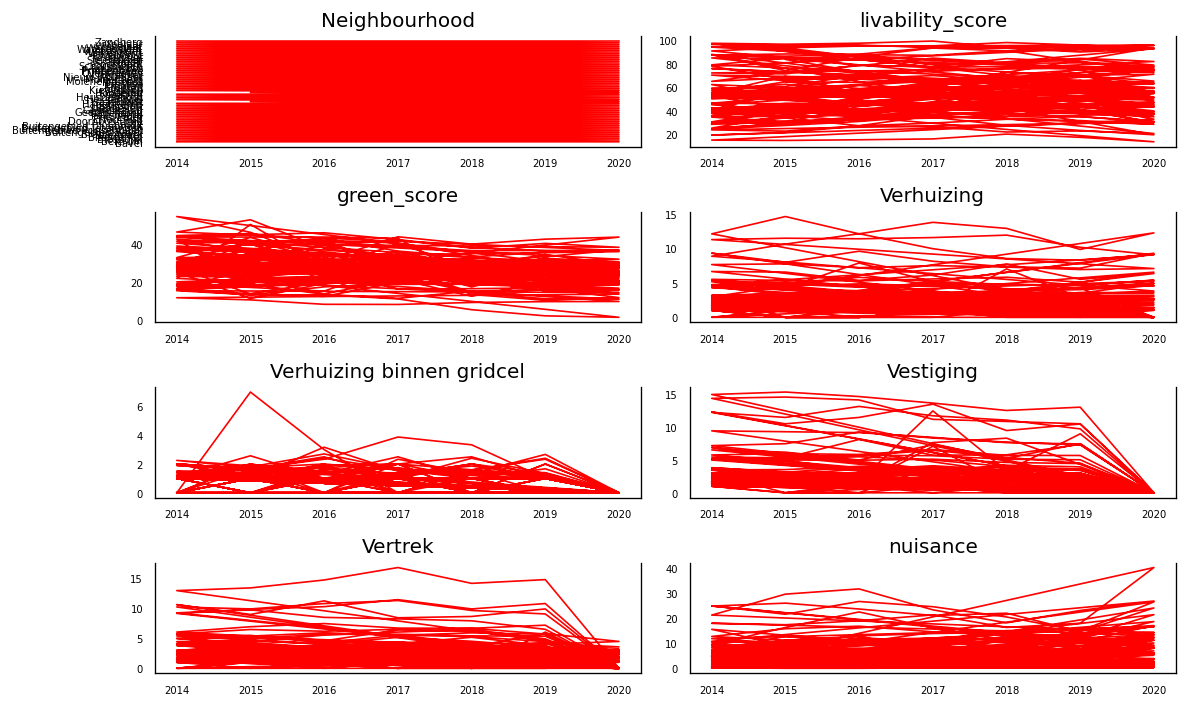

In [202]:
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10, 6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [8]:
col1 = 'green_score'
col2 = 'livability_score'
ad_fuller_result_1 = adfuller(df[col1].diff()[1:])

print('realgdp')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(df[col2].diff()[1:])

print('realcons')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

realgdp
ADF Statistic: -9.263309328305898
p-value: 1.3882588141327325e-15

---------------------

realcons
ADF Statistic: -22.47475471862035
p-value: 0.0


In [9]:
print('rgnp causes ulc?\n')
print('------------------')
granger_1 = grangercausalitytests(df[[col1, col2]], 4)

print('\nulc causes rgnp?\n')
print('------------------')
granger_2 = grangercausalitytests(df[[col2, col1]], 4)

rgnp causes ulc?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4473  , p=0.2297  , df_denom=384, df_num=1
ssr based chi2 test:   chi2=1.4586  , p=0.2272  , df=1
likelihood ratio test: chi2=1.4558  , p=0.2276  , df=1
parameter F test:         F=1.4473  , p=0.2297  , df_denom=384, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1267  , p=0.3252  , df_denom=381, df_num=2
ssr based chi2 test:   chi2=2.2829  , p=0.3194  , df=2
likelihood ratio test: chi2=2.2762  , p=0.3204  , df=2
parameter F test:         F=1.1267  , p=0.3252  , df_denom=381, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0949  , p=0.3512  , df_denom=378, df_num=3
ssr based chi2 test:   chi2=3.3454  , p=0.3414  , df=3
likelihood ratio test: chi2=3.3309  , p=0.3434  , df=3
parameter F test:         F=1.0949  , p=0.3512  , df_denom=378, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F

In [10]:
df = df[[col1, col2]]
print(df.shape)

(388, 2)


In [11]:
train_df = df[:-12]
test_df = df[-12:]

In [12]:
print(test_df.shape)

(12, 2)


In [13]:
model = VAR(train_df.diff()[1:])

In [14]:
sorted_order = model.select_order(maxlags=20)
print(sorted_order.summary())


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        8.602       8.624       5441.       8.610
1        8.549      8.614*       5161.      8.575*
2        8.566       8.675       5251.       8.610
3        8.555       8.707       5191.       8.615
4        8.516       8.712       4994.       8.594
5        8.499       8.739       4908.       8.594
6        8.506       8.789       4944.       8.619
7        8.509       8.836       4958.       8.639
8        8.526       8.897       5046.       8.674
9        8.535       8.950       5092.       8.700
10       8.519       8.978       5013.       8.702
11       8.490       8.992       4867.       8.689
12      8.482*       9.028      4831.*       8.699
13       8.490       9.079       4868.       8.724
14       8.500       9.133       4919.       8.752
15       8.515       9.191       4993.       8.784
16       8.522       9.242     

In [246]:
var_model = VARMAX(train_df, order=(1, 1))
fitted_model = var_model.fit(disp=True)
print(fitted_model.summary())

                                    Statespace Model Results                                   
Dep. Variable:     ['green_score', 'livability_score']   No. Observations:                  376
Model:                                      VARMA(1,1)   Log Likelihood               -2609.507
                                           + intercept   AIC                           5247.014
Date:                                 Wed, 07 Jun 2023   BIC                           5302.029
Time:                                         04:46:17   HQIC                          5268.853
Sample:                                              0   Scale                            0.988
                                                 - 376                                         
Covariance Type:                                   opg                                         
Ljung-Box (L1) (Q):             0.01, 0.00   Jarque-Bera (JB):        61.87, 417.10
Prob(Q):                        0.94, 0.96   Prob(JB

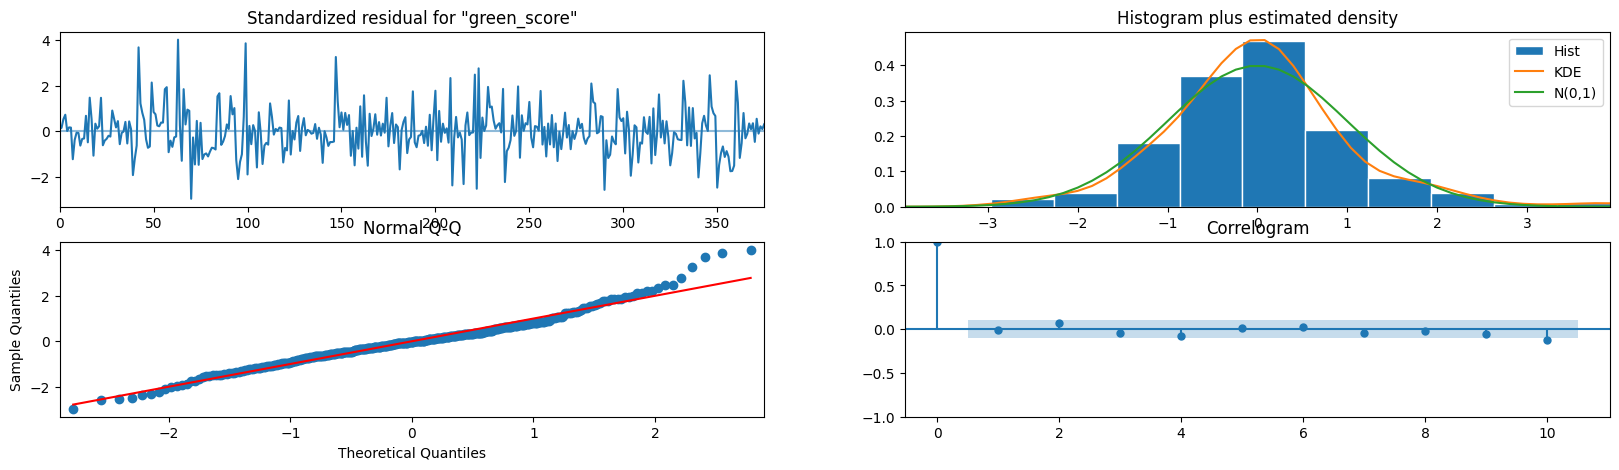

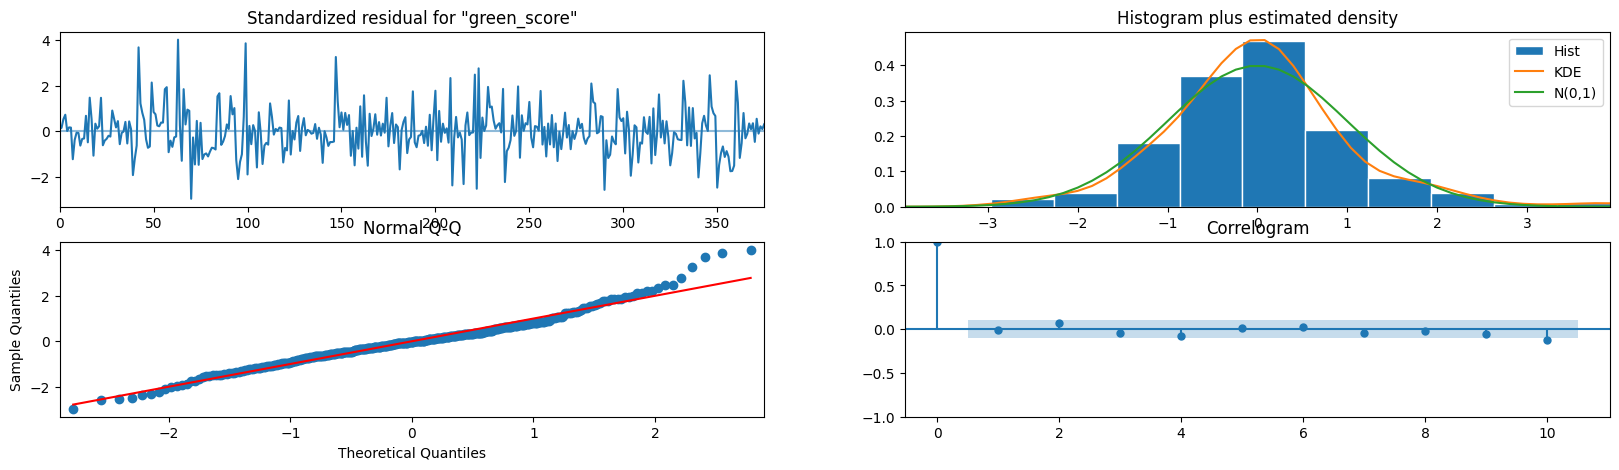

In [257]:
fitted_model.plot_diagnostics(0, figsize=(20, 5))

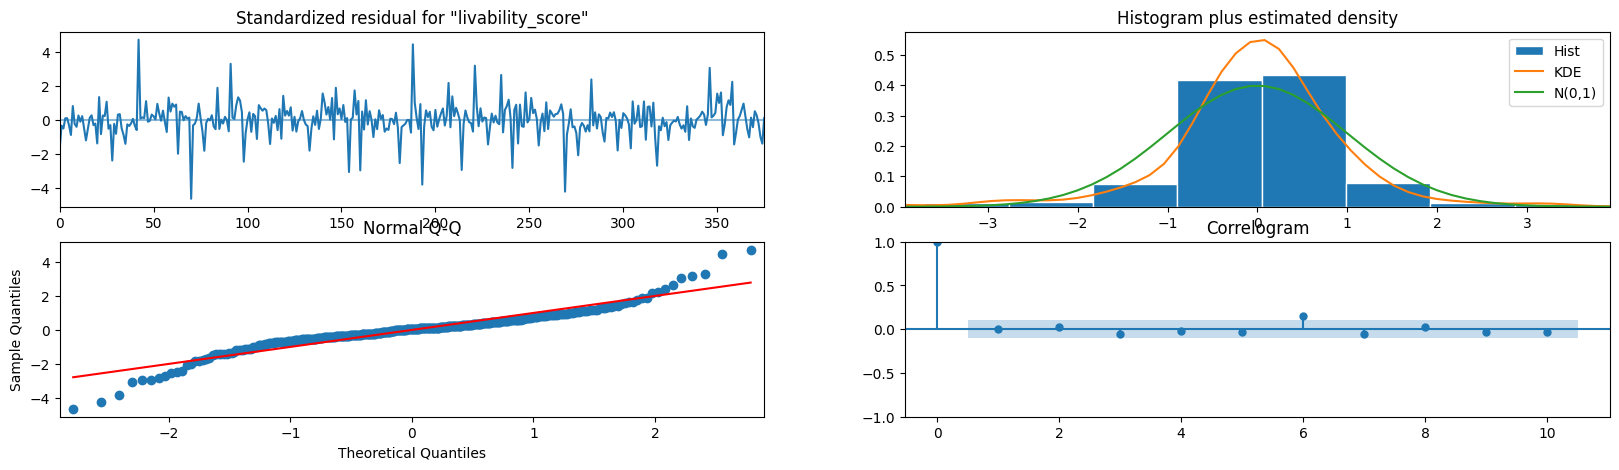

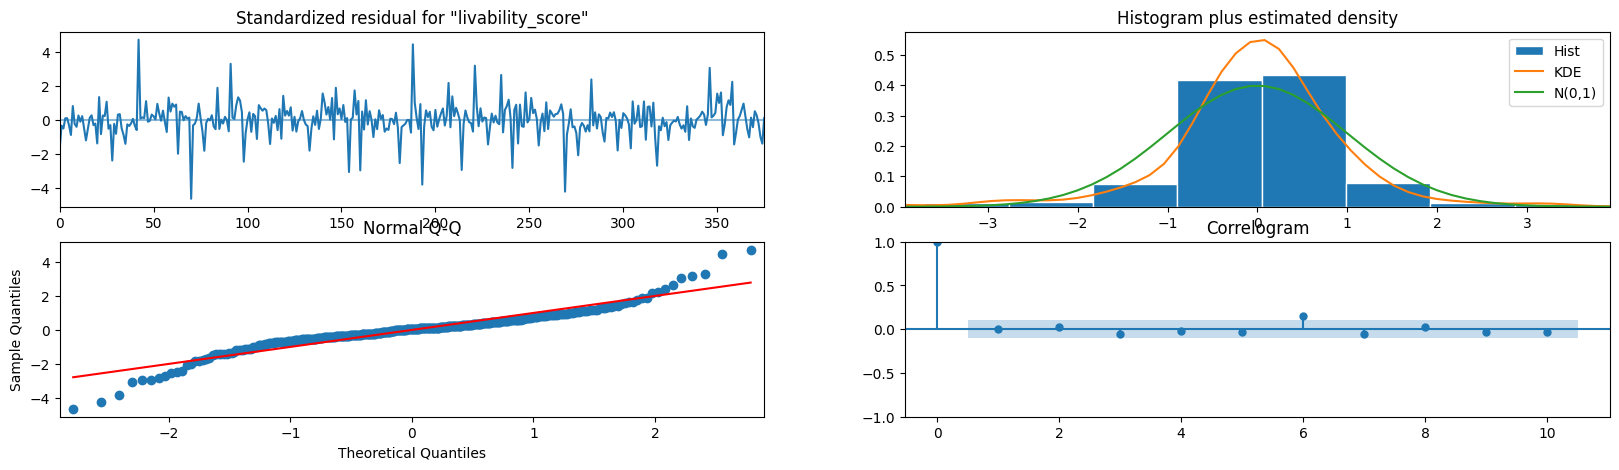

In [258]:
fitted_model.plot_diagnostics(1, figsize=(20, 5))

In [247]:
n_forecast = 12
predict = fitted_model.get_prediction(start=len(train_df),
                                      end=len(train_df) + n_forecast - 1)

predictions = predict.predicted_mean

In [248]:
indexes = []
cur_value = train_df.index[-1]
for el in range(len(predictions)):
    indexes.append(cur_value + pd.offsets.DateOffset(years=1))
cur_value = indexes[-1]

In [249]:
predictions.columns = [f'{col1}_predicted', f'{col2}_predicted']
predictions.index = indexes
predictions = predictions.reset_index()
predictions

,index,green_score_predicted,livability_score_predicted
0,2016-01-01,28.990807,47.700519
1,2016-01-01,28.074422,49.122629
2,2016-01-01,27.522131,50.281850
3,2016-01-01,27.198324,51.239180
4,2016-01-01,27.016792,52.038209
5,2016-01-01,26.922878,52.710765
6,2016-01-01,26.882054,53.280618
7,2016-01-01,26.872619,53.765919
8,2016-01-01,26.881028,54.180827
9,2016-01-01,26.898912,54.536602


In [250]:
test_vs_pred = pd.merge(predictions, test_df.reset_index(), how='left', left_on='index', right_on='year')

In [251]:
test_vs_pred

,index,green_score_predicted,livability_score_predicted,year,green_score,livability_score
0,2016-01-01,28.990807,47.700519,2016-01-01,28.874570,46.663648
1,2016-01-01,28.990807,47.700519,2016-01-01,26.731392,39.305028
2,2016-01-01,28.074422,49.122629,2016-01-01,28.874570,46.663648
3,2016-01-01,28.074422,49.122629,2016-01-01,26.731392,39.305028
4,2016-01-01,27.522131,50.281850,2016-01-01,28.874570,46.663648
5,2016-01-01,27.522131,50.281850,2016-01-01,26.731392,39.305028
6,2016-01-01,27.198324,51.239180,2016-01-01,28.874570,46.663648
7,2016-01-01,27.198324,51.239180,2016-01-01,26.731392,39.305028
8,2016-01-01,27.016792,52.038209,2016-01-01,28.874570,46.663648
9,2016-01-01,27.016792,52.038209,2016-01-01,26.731392,39.305028


<Axes: >

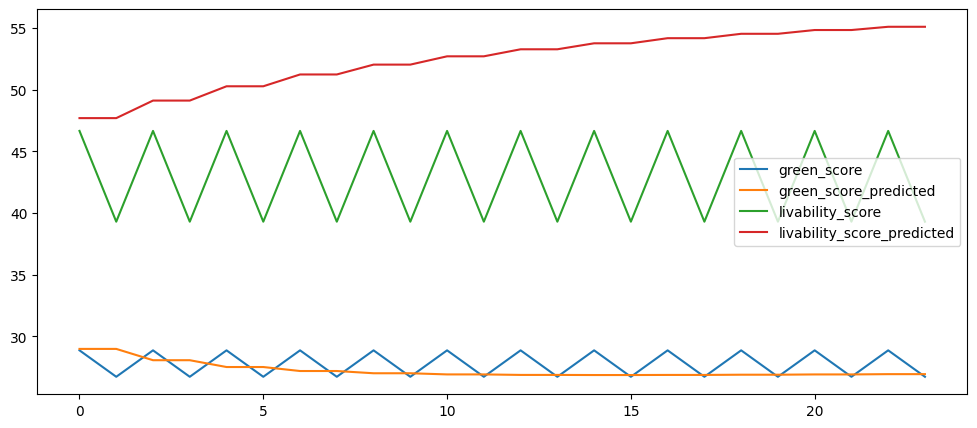

In [252]:
test_vs_pred[[col1, f'{col1}_predicted', col2, f'{col2}_predicted']].plot(
    figsize=(12, 5))

In [164]:
from sklearn.metrics import mean_squared_error
import math
from statistics import mean

rmse_ulc = math.sqrt(mean_squared_error(predictions[f'{col1}_predicted'], test_df[col1]))
print('Mean value of {} is : {}. Root Mean Squared Error is :{}'.format(col1, mean(test_df[col1]), rmse_ulc))

rmse_rgnp = math.sqrt(mean_squared_error(predictions[f'{col2}_predicted'], test_df[col2]))
print('Mean value of {} is : {}. Root Mean Squared Error is :{}'.format(col2, mean(test_df[col2]), rmse_rgnp))

Mean value of green_score is : 26.12149850249793. Root Mean Squared Error is :5.834427351331625
Mean value of livability_score is : 42.00986884193642. Root Mean Squared Error is :11.354983915087066
